<h1> AWS and Machine Learning </h1>

> Data Cleaning - Strategies for Missing Values - Advanced Imputation Strategy- KNN

GitHub Link: https://github.com/data-analytics-professionals

In [1]:
# Set the Jyputer Notebook, width: 100% 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

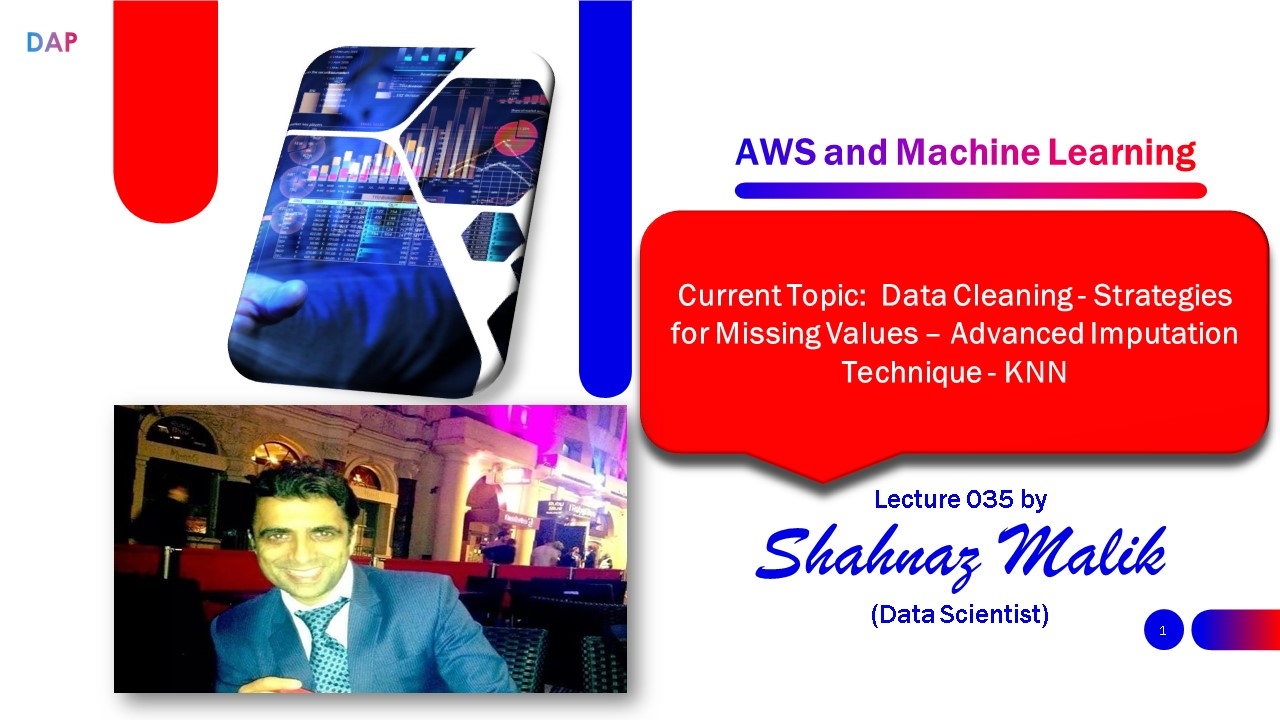

In [2]:
from IPython.display import Image
cover = Image(filename="../project_diabetes/photos/035-Advanced Imputation Strategy- KNN.jpg")
display(cover)

> > Data Acquisition 

In [3]:
# Load the libraries (numpy, pandas) for data analysis and data wrangling
import numpy as np
import pandas as pd

# Read the dataset 'ddiabetes-with-missing-values.csv'
df = pd.read_csv('data/diabetes-with-missing-values.csv')

In [4]:
# Sample function return a random sample of n items from an axis of object.
df.sample(n=10)

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
331,2.0,87.0,58.0,16.0,52.0,32.7,0.166,25,0
669,9.0,154.0,78.0,30.0,100.0,30.9,0.164,45,0
189,5.0,139.0,NaN,35.0,160.0,31.6,0.361,25,1
526,1.0,97.0,64.0,19.0,82.0,18.2,0.299,21,0
620,2.0,112.0,86.0,42.0,160.0,38.4,0.246,28,0
223,7.0,142.0,60.0,33.0,190.0,28.8,0.687,61,0
660,10.0,162.0,84.0,0.0,0.0,27.7,0.182,54,0
358,12.0,88.0,74.0,40.0,54.0,35.3,0.378,48,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32,1
711,5.0,126.0,78.0,27.0,22.0,29.6,0.439,40,0


In [5]:
# info function prints a concise summary of a DataFrame including the index dtype and column dtypes, non-null values and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnancies    767 non-null float64
glucose        758 non-null float64
diastolic      729 non-null float64
triceps        767 non-null float64
insulin        766 non-null float64
bmi            765 non-null float64
dpf            768 non-null float64
age            768 non-null int64
diabetes       768 non-null int64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


In [6]:
# Print the description of the dataframe df
df.describe()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
count,767.000000,758.000000,729.000000,767.000000,766.000000,765.000000,768.000000,768.000000,768.000000
mean,3.846154,120.996042,68.772291,20.530639,79.916449,31.975556,0.471876,33.240885,0.348958
std,3.371638,31.970780,19.633881,15.961811,115.357873,7.875099,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.750000,80.000000,32.000000,127.750000,36.500000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


> Analyzing Missingness Percentage

In [7]:
# Create a nullity DataFrame df_nullity
df_nullity = df.isnull()

In [8]:
# print nullity df_nullity
df_nullity.head(n=10)

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


In [9]:
# Calculate total of missing values
print('Total Missing Values:\n', df_nullity.sum())

Total Missing Values:
 pregnancies     1
glucose        10
diastolic      39
triceps         1
insulin         2
bmi             3
dpf             0
age             0
diabetes        0
dtype: int64


In [10]:
# Calculate percentage of missing values
df_nullity_percent =  df_nullity.mean() * 100
print('Percentage of Missing Values:\n', df_nullity_percent)

Percentage of Missing Values:
 pregnancies    0.130208
glucose        1.302083
diastolic      5.078125
triceps        0.130208
insulin        0.260417
bmi            0.390625
dpf            0.000000
age            0.000000
diabetes       0.000000
dtype: float64


> Visualize Missingness

In [11]:
# Import missingno as msno
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline

print(plt.style.available)


['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


In [12]:
# Set Solarize_Light2 style
plt.style.use('Solarize_Light2')

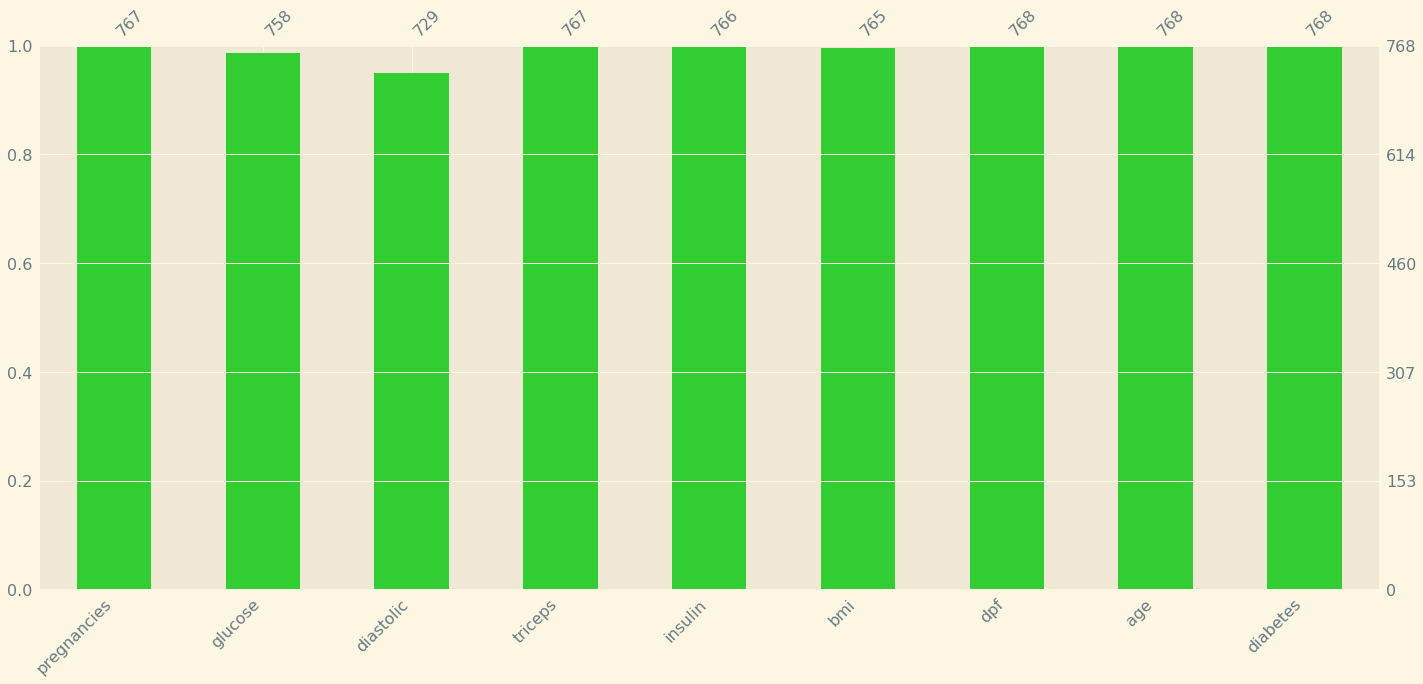

In [13]:
# Plot amount of missingness in the DataFrame
msno.bar(
    df,
    figsize=(24, 10),
    fontsize=16,
    labels=None,
    log=False,
    color='limegreen',
    inline=False,
    filter=None,
    n=0,
    p=0,
    sort=None,
    ax=None
)

plt.show()


> Plot the nullity matrix of df

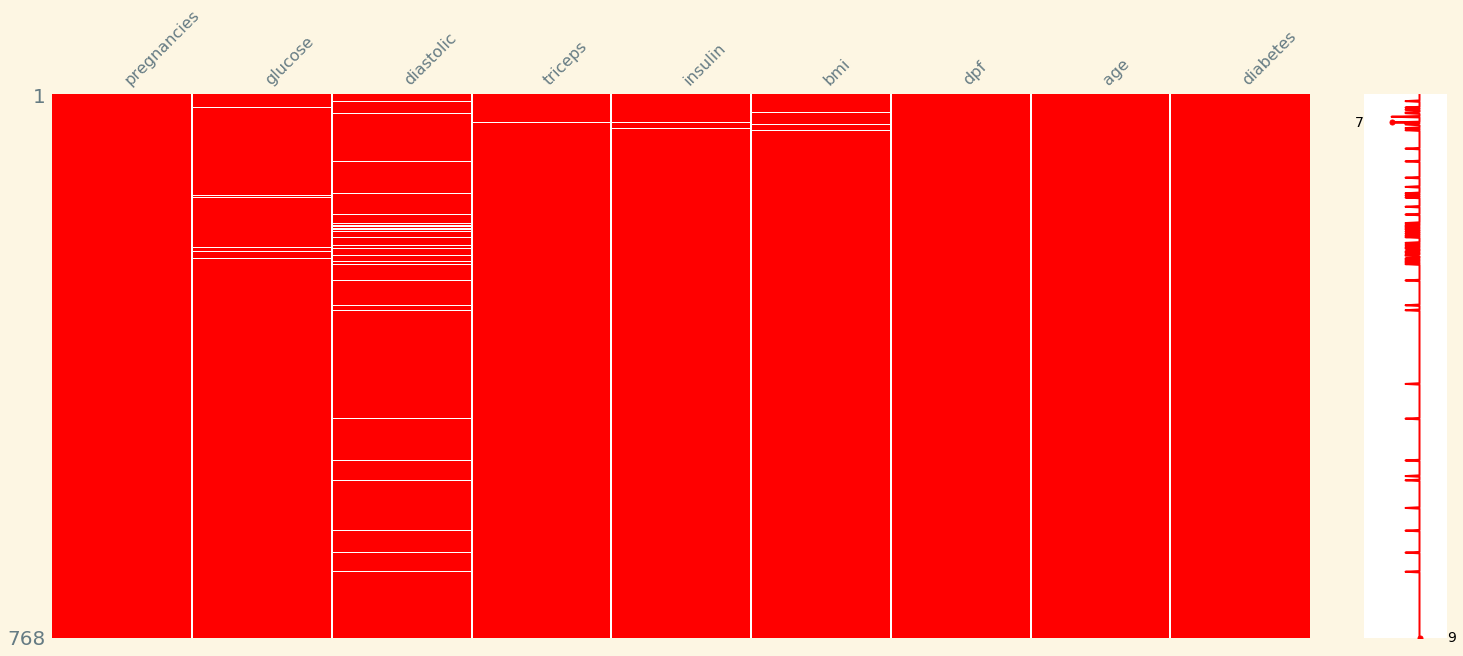

In [14]:
# Plot nullity matrix of df
msno.matrix(
    df=df,
    filter=None,
    n=0,
    p=0,
    sort=None,
    figsize=(25, 10),
    width_ratios=(15, 1),
    color=(1,0,0),
    fontsize=16,
    labels=None,
    sparkline=True,
    inline=False,
    freq=None,
    ax=None,
)

plt.show()


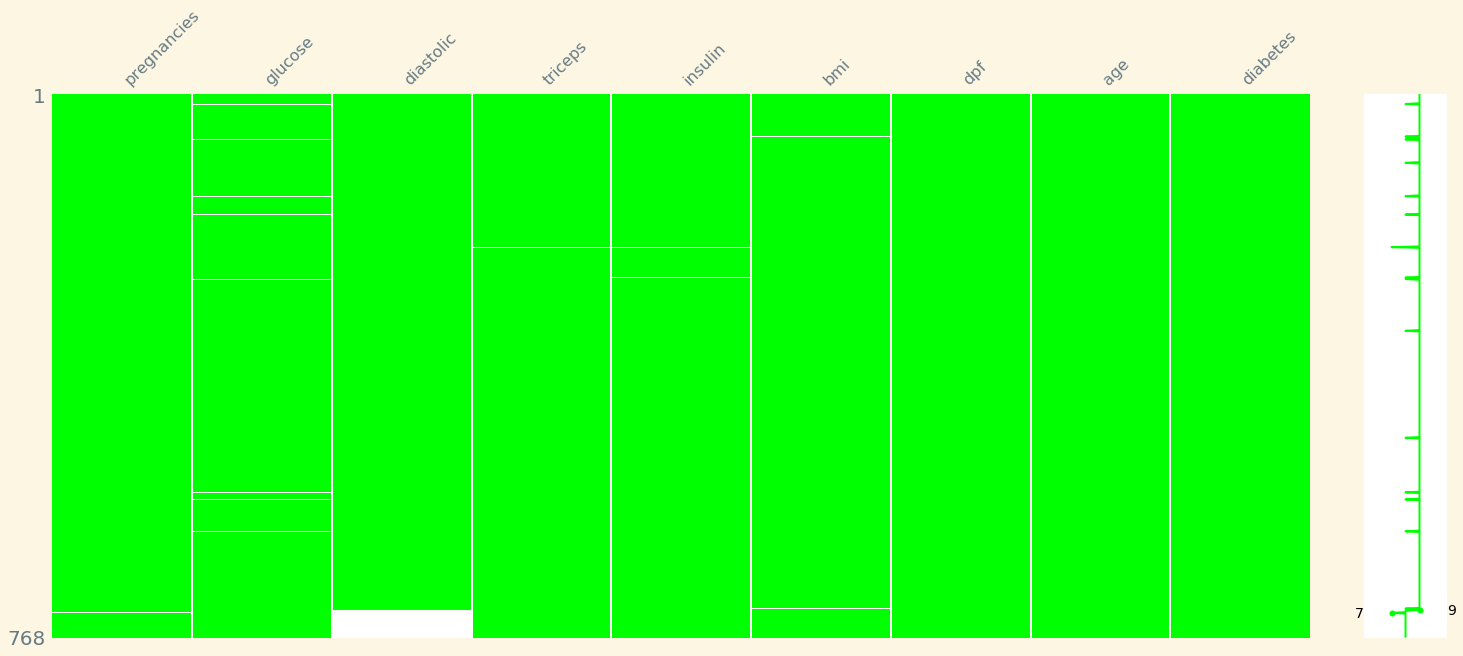

In [15]:
# Sort diabetes dataframe df on 'diastolic'
sorted_values = df.sort_values(by=['diastolic'])

# Visualize the missingness summary of sorted
msno.matrix(
    sorted_values,
    filter=None,
    n=0,
    p=0,
    sort=None,
    figsize=(25, 10),
    width_ratios=(15, 1),
    color=(0,1,0),
    fontsize=16,
    labels=None,
    sparkline=True,
    inline=False,
    freq=None,
    ax=None,
)

plt.show()

> Correlations Between Missing Data (Missingness)

> Remember we could find correlations between missing data and it helps us to gain a deeper understanding of the type of missing data.
> It also provides suitable ways in which the missing values can be addressed.


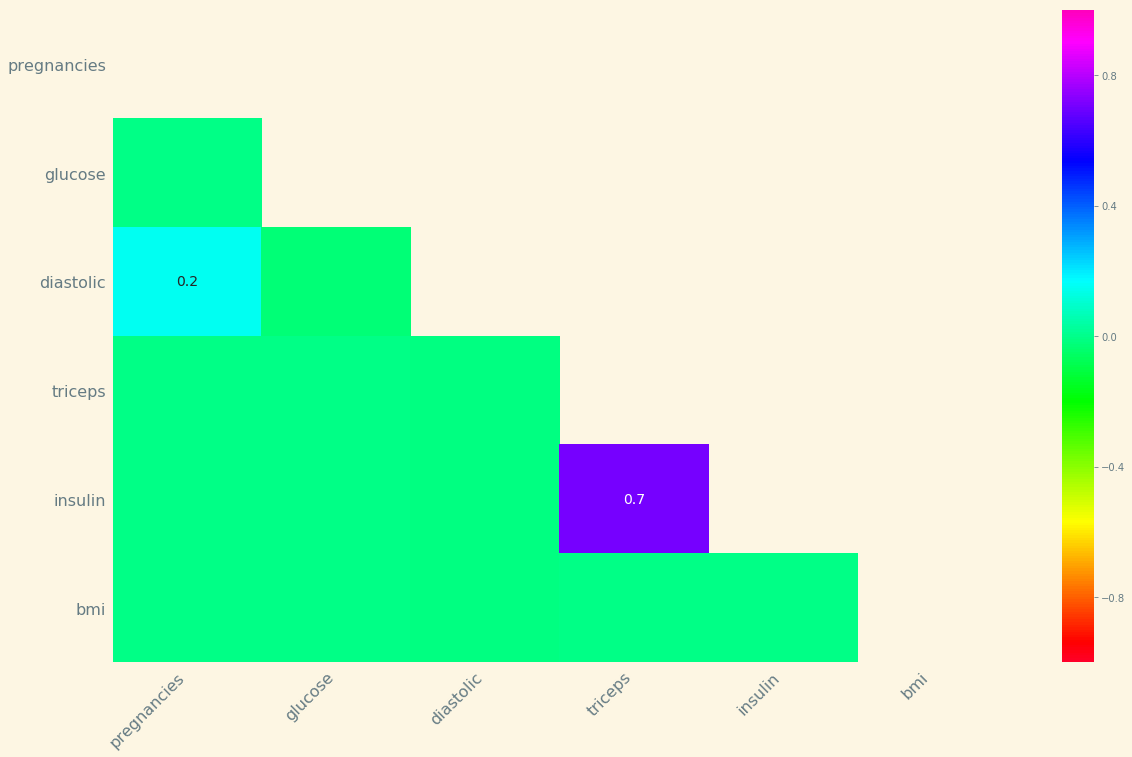

In [16]:
# Plot missingness heatmap of diabetes DataFrame df
msno.heatmap(
    df,
    inline=False,
    filter=None,
    n=0,
    p=0,
    sort=None,
    figsize=(20, 12),
    fontsize=16,
    labels=True,
    cmap='gist_rainbow',
    vmin=-1,
    vmax=1,
    cbar=True,
    ax=None,
)

# Show plot
plt.show()

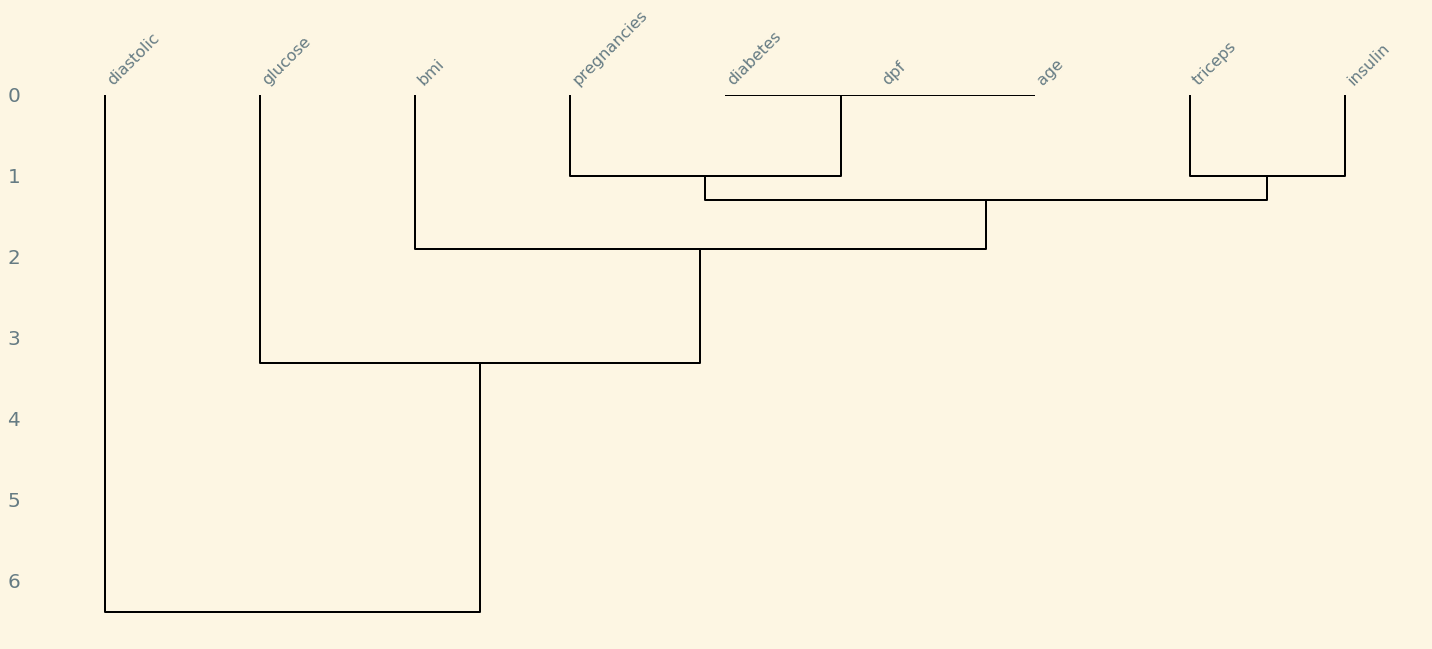

In [17]:
# Plot missingness dendrogram of diabetes DataFrame df
msno.dendrogram(
    df,
    method='average',
    filter=None,
    n=0,
    p=0,
    orientation=None,
    figsize=None,
    fontsize=16,
    inline=False,
    ax=None,
)

# Show plot
plt.show()

In [18]:
# Import KNN from fancyimpute
from fancyimpute import KNN

# Copy diabetes to diabetes_knn_imputed
diabetes_knn_imputed = df.copy(deep=True)

# Initialize KNN
knn_imputer = KNN()

# Impute using fit_tranform on diabetes_knn_imputed
diabetes_knn_imputed.iloc[:, :] = knn_imputer.fit_transform(diabetes_knn_imputed)

C:\DataScience\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Imputing row 1/768 with 0 missing, elapsed time: 0.148
Imputing row 101/768 with 0 missing, elapsed time: 0.150
Imputing row 201/768 with 1 missing, elapsed time: 0.152
Imputing row 301/768 with 0 missing, elapsed time: 0.153
Imputing row 401/768 with 0 missing, elapsed time: 0.154
Imputing row 501/768 with 0 missing, elapsed time: 0.155
Imputing row 601/768 with 0 missing, elapsed time: 0.156
Imputing row 701/768 with 0 missing, elapsed time: 0.157


In [19]:
# Create a nullity DataFrame df_nullity from diabetes_knn_imputed
df_nullity = diabetes_knn_imputed.isnull()

In [20]:
# Calculate total of missing values
print('Total Missing Values:\n', df_nullity.sum())

Total Missing Values:
 pregnancies    0
glucose        0
diastolic      0
triceps        0
insulin        0
bmi            0
dpf            0
age            0
diabetes       0
dtype: int64
